In [2]:
# TODO..
# revenu per market by year
# market yearly/monthly sales 
# customer breakdown type/sals/market/date
# pie chart vs revinue for that year/month

In [3]:
import sqlite3
from sqlite3 import OperationalError

import numpy as np
import pandas as pd

from os import path
import datetime 

import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# connect to local database file.
connection = sqlite3.connect('db_dump.db')

# create cursor to execute sql querys with the connected database
cursor = connection.cursor()

In [5]:
connection

In [6]:
# getting list of tables in db.

def run_query(query):
    cursor = connection.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    return(result)

q = "SELECT name FROM sqlite_master WHERE type='table';"
tables = run_query(q)
tables = [x[0] for x in tables]
tables

['customers', 'date', 'markets', 'products', 'transactions']

In [7]:
# testing out functionality of gathering table names.

q_test = 'SELECT * FROM date;'

# have to have an executed cursor to get description.
cursor.execute(q_test)

# create list with lambda of cursor description and mapping index 0 to x and adding to list.
names = list(map(lambda x: x[0], cursor.description))
names

['date', 'cy_date', 'year', 'month_name', 'date_yy_mmm']

In [8]:
# testing out functonality of pandas df from sql table.
df_date = pd.DataFrame(run_query(q_test), columns=names)
df_date

,date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun\r
1,2017-06-02,2017-06-01,2017,June,17-Jun\r
2,2017-06-03,2017-06-01,2017,June,17-Jun\r
3,2017-06-04,2017-06-01,2017,June,17-Jun\r
4,2017-06-05,2017-06-01,2017,June,17-Jun\r
...,...,...,...,...,...
1121,2020-06-26,2020-06-01,2020,June,20-Jun\r
1122,2020-06-27,2020-06-01,2020,June,20-Jun\r
1123,2020-06-28,2020-06-01,2020,June,20-Jun\r
1124,2020-06-29,2020-06-01,2020,June,20-Jun\r


In [9]:
# create fucntion that turns sql table to pandas df.

def make_df(table):
    
    '''
    Use table name from list of tables as user input.
    input must be string.
    '''
    
    q = f'SELECT * FROM {table}'
    cursor = connection.cursor()
    cursor.execute(q)
    result = cursor.fetchall()
    names = list(map(lambda x: x[0], cursor.description))
    data = pd.DataFrame(result, columns=names )
    cursor.close()
    return data

In [10]:
# test pd df in dictionary
test_dict = {}
test_dict['date'] = make_df('date')
test_dict['date']

,date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun\r
1,2017-06-02,2017-06-01,2017,June,17-Jun\r
2,2017-06-03,2017-06-01,2017,June,17-Jun\r
3,2017-06-04,2017-06-01,2017,June,17-Jun\r
4,2017-06-05,2017-06-01,2017,June,17-Jun\r
...,...,...,...,...,...
1121,2020-06-26,2020-06-01,2020,June,20-Jun\r
1122,2020-06-27,2020-06-01,2020,June,20-Jun\r
1123,2020-06-28,2020-06-01,2020,June,20-Jun\r
1124,2020-06-29,2020-06-01,2020,June,20-Jun\r


In [11]:
# simple query running function.

# dont really need unless running querys:
def run_query(query):
    cursor = connection.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    return(result)

def make_df_dict(db):
    
    '''
    Function: make_df_dict converts sqlite database to dictonary containing all tables.
    
    Input:
        db: is string representation of path to datebase.
        Example -> 'db_dump.db' (file extention = *.db)
    
    Functonality:
        function takes in connection object, gets all table names, column names of each 
        table. creates pandas DataFrame from table with corresponding column names.
        adds DataFrame object to dictonary with key equal to name of the table. 

    Return:
        Dictonary returned containing tables from sql database.
    '''
    
    if path.exists(db):
    
        connection = sqlite3.connect(db)

        data_dict = {}

        cursor = connection.cursor()

        # get table names to itter
        q_tables = "SELECT name FROM sqlite_master WHERE type='table';"
        cursor.execute(q_tables)
        tables = cursor.fetchall()
        tables = [x[0] for x in tables]

        # itter tables/make pandas object from each table.
        for i in tables:
            q = f'SELECT * FROM {i}'
            cursor = connection.cursor()
            cursor.execute(q)
            result = cursor.fetchall()
            names = list(map(lambda x: x[0], cursor.description))
            data_dict[i] = pd.DataFrame(result, columns=names )
            
    else:
        print('Check Path!')

        
    return data_dict

In [12]:
data_dict = make_df_dict('db_dump.db')
data_dict.keys()

dict_keys(['customers', 'date', 'markets', 'products', 'transactions'])

In [13]:
path.exists('db_dump.db')

True

In [14]:
data_dict['transactions']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR
...,...,...,...,...,...,...,...
150278,Prod339,Cus005,Mark004,2019-04-18,1,394.0,INR\r
150279,Prod339,Cus020,Mark004,2019-04-23,1,667.0,INR\r
150280,Prod339,Cus007,Mark004,2019-04-23,1,625.0,INR\r
150281,Prod339,Cus006,Mark004,2019-04-24,7,8625.0,INR\r


In [24]:
data_dict['transactions'].rename(columns={'market_code':'markets_code'}, inplace=True)
df_transactions = data_dict['transactions']
df_products = data_dict['products']
df = pd.merge(df_transactions, df_products, on='product_code', how='outer')
df = pd.merge(df, data_dict['customers'], on='customer_code', how='outer')
df = pd.merge(df, data_dict['markets'], on='markets_code', how='outer')
df.rename(columns={'order_date':'date'}, inplace=True)
df = pd.merge(df, data_dict['date'], on='date', how='outer')

# clean columns
df['currency'] = df.currency.astype(str)
df['date_yy_mmm'] = df['date_yy_mmm'].astype(str)


df['currency'] = df['currency'].apply(lambda x: x.strip('\r'))
df['product_type'] = df['product_type'].replace(np.nan, 'missing', regex=True)
df['product_type'] = df['product_type'].apply(lambda x: x.strip('\r'))
df['date_yy_mmm'] = df['date_yy_mmm'].apply(lambda x: x.strip('\r'))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150605 entries, 0 to 150604
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_code   150283 non-null  object 
 1   customer_code  150283 non-null  object 
 2   markets_code   150285 non-null  object 
 3   date           150603 non-null  object 
 4   sales_qty      150283 non-null  float64
 5   sales_amount   150283 non-null  float64
 6   currency       150605 non-null  object 
 7   product_type   150605 non-null  object 
 8   custmer_name   150283 non-null  object 
 9   customer_type  150283 non-null  object 
 10  markets_name   150285 non-null  object 
 11  zone           150285 non-null  object 
 12  cy_date        150603 non-null  object 
 13  year           150603 non-null  float64
 14  month_name     150603 non-null  object 
 15  date_yy_mmm    150605 non-null  object 
dtypes: float64(3), object(13)
memory usage: 19.5+ MB


In [25]:
# look for fat
df.isnull().sum()

product_code     322
customer_code    322
markets_code     320
date               2
sales_qty        322
sales_amount     322
currency           0
product_type       0
custmer_name     322
customer_type    322
markets_name     320
zone             320
cy_date            2
year               2
month_name         2
date_yy_mmm        0
dtype: int64

In [26]:
# trim fat
df = df[:-322]
df.isnull().sum()

product_code     0
customer_code    0
markets_code     0
date             0
sales_qty        0
sales_amount     0
currency         0
product_type     0
custmer_name     0
customer_type    0
markets_name     0
zone             0
cy_date          0
year             0
month_name       0
date_yy_mmm      0
dtype: int64

In [27]:
# get price of product

In [28]:
# total number of customers
df['custmer_name'].value_counts()

Premium Stores              20003
Nixon                       17340
Electricalsara Stores       13877
Electricalsopedia Stores    11726
Excel Stores                 9559
Power                        6930
Info Stores                  6176
Epic Stores                  5490
Surge Stores                 4983
Electricalslytical           4792
Nomad Stores                 4556
Atlas Stores                 4472
Propel                       4226
Modular                      3619
Electricalslance Stores      3143
Logic Stores                 2901
Relief                       2755
Control                      2204
Sound                        2147
Integration Stores           1864
Flawless Stores              1843
Surface Stores               1756
Forward Stores               1625
All-Out                      1446
Electricalsocity             1414
Acclaimed Stores             1387
Insight                      1223
Unity Stores                 1208
Novus                        1090
Zone          

In [29]:
# number of customers; matches sql 
len(df['customer_code'].value_counts().index)

38

In [30]:
len(df[df['markets_code'] == 'Mark001'])

1035

/home/terrence/anaconda3/envs/unit4sprint2/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


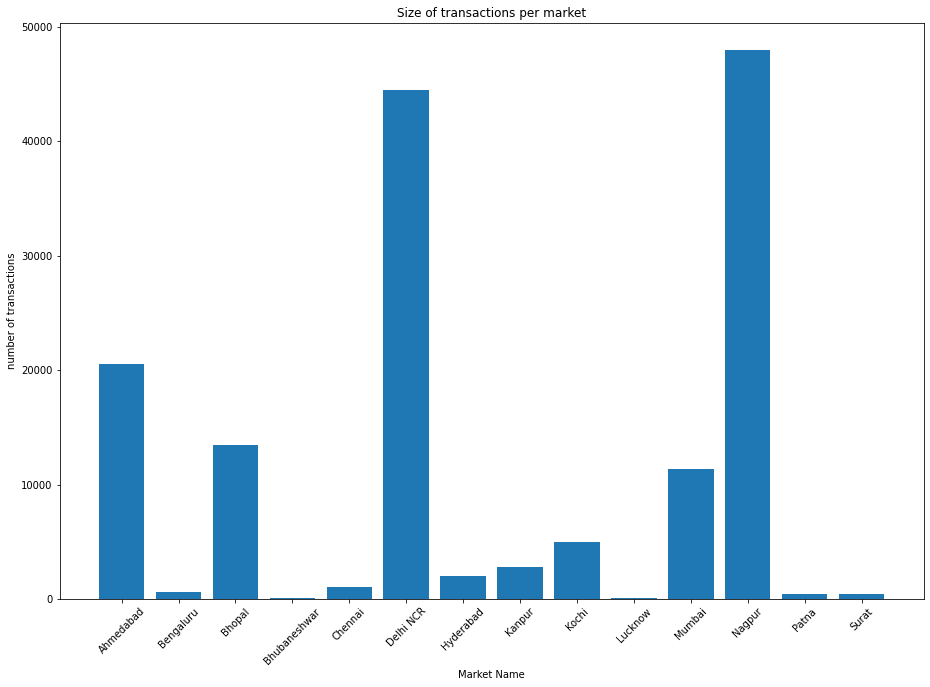

In [31]:
# name of each market
market_names = sorted(sorted(df['markets_name'].unique()))

# number of transactions per market
market_transaction_size = []
for i in market_names:
    market_transaction_size.append(len(df[df['markets_name'] == i]))

# number of transactions vs market
fig = plt.figure()
ax = fig.add_axes([2,2,2,2])
ax.bar(market_names, market_transaction_size)
plt.title('Size of transactions per market')
plt.xlabel('Market Name')
plt.ylabel('number of transactions')  
plt.xticks(rotation=45)

fig.show();

In [32]:
# confirmation
len(df[df['markets_name']=='Delhi NCR'])

44442

/home/terrence/anaconda3/envs/unit4sprint2/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


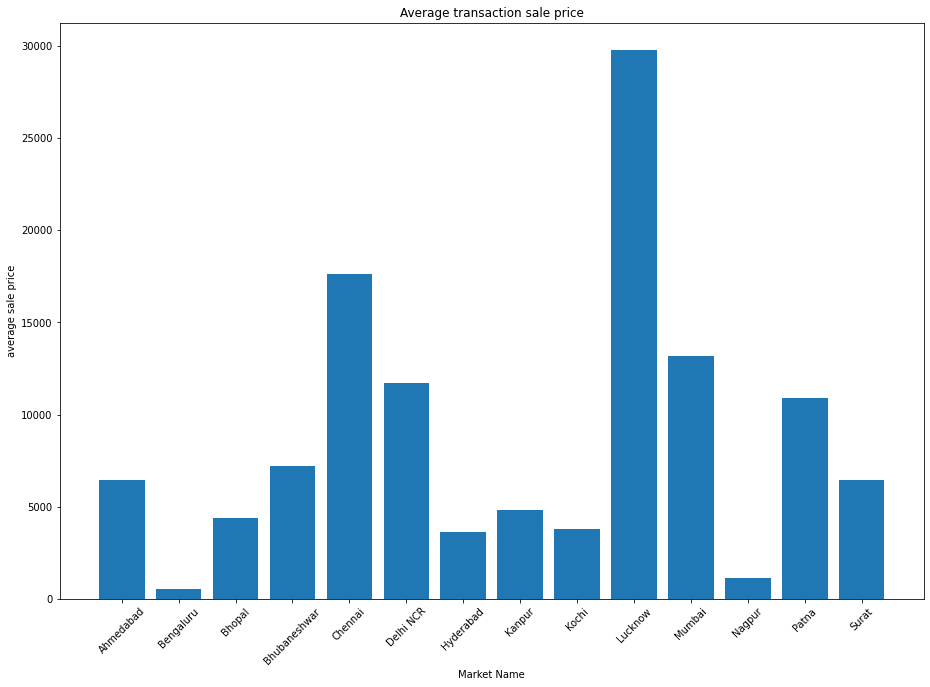

In [33]:
customer_group = df.groupby('markets_name').mean()

# average sale price vs market
fig = plt.figure()
ax = fig.add_axes([2,2,2,2])
ax.bar(customer_group.index, customer_group['sales_amount'])
plt.title('Average transaction sale price')
plt.xlabel('Market Name')
plt.ylabel('average sale price')  
plt.xticks(rotation=45)

fig.show();

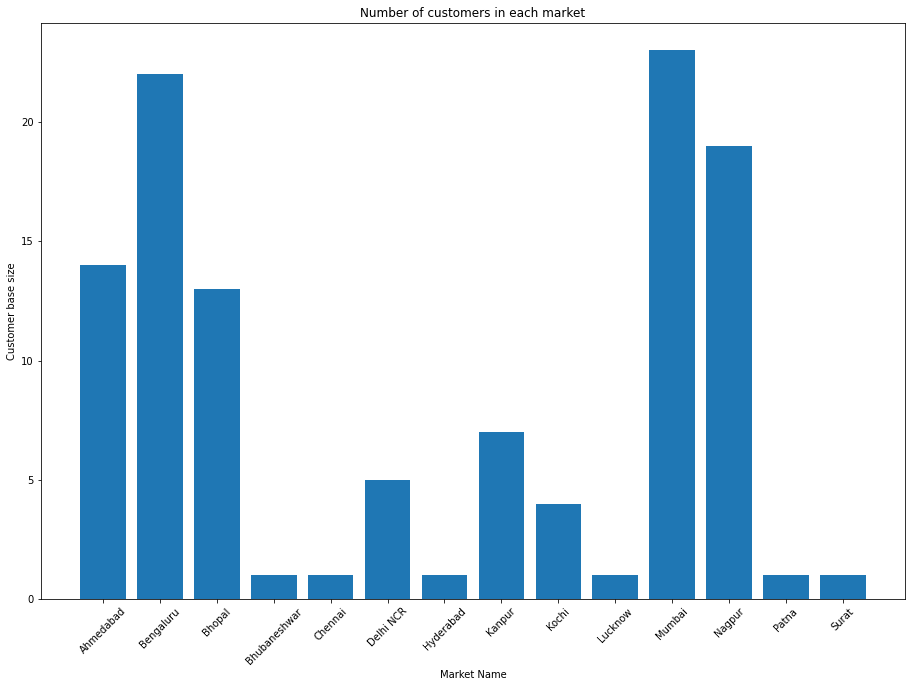

In [34]:
# number of customers vs market
customer_base = []
for market in market_names:
    customer_base.append(len(df[df['markets_name']== market]['customer_code'].unique()))

fig = plt.figure()
ax = fig.add_axes([2,2,2,2])
ax.bar(market_names, customer_base)
plt.title('Number of customers in each market')
plt.xlabel('Market Name')
plt.ylabel('Customer base size')  
plt.xticks(rotation=45)
plt.show();

In [35]:
# convert db to csv

# df.to_csv('db_csv.csv', index=False)
# df2 = pd.read_csv('db_csv.csv')
# df2.isnull().sum()

In [78]:
df_2017 = df.query('year == 2017')

In [79]:
fig = px.pie(df_2017, values='sales_usd', names='markets_name', title='revenue by market for year 2017')
fig.show()

In [42]:
df_2017

,product_code,customer_code,markets_code,date,sales_qty,sales_amount,currency,product_type,custmer_name,customer_type,markets_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100.0,41241.0,INR,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017.0,October,17-Oct
1,Prod001,Cus001,Mark001,2017-10-10,100.0,41241.0,INR,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017.0,October,17-Oct
2,Prod013,Cus001,Mark001,2017-10-10,240.0,143560.0,INR,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017.0,October,17-Oct
3,Prod013,Cus001,Mark001,2017-10-10,240.0,143560.0,INR,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017.0,October,17-Oct
4,Prod020,Cus001,Mark001,2017-10-10,140.0,153019.0,INR,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017.0,October,17-Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150048,Prod134,Cus005,Mark004,2017-11-19,1.0,60.0,INR,Own Brand,Premium Stores,Brick & Mortar,Delhi NCR,North,2017-11-01,2017.0,November,17-Nov
150049,Prod279,Cus005,Mark004,2017-11-19,1.0,120.0,INR,Distribution,Premium Stores,Brick & Mortar,Delhi NCR,North,2017-11-01,2017.0,November,17-Nov
150050,Prod286,Cus005,Mark004,2017-11-19,1.0,51.0,INR,missing,Premium Stores,Brick & Mortar,Delhi NCR,North,2017-11-01,2017.0,November,17-Nov
150051,Prod301,Cus005,Mark004,2017-11-19,1.0,130.0,INR,missing,Premium Stores,Brick & Mortar,Delhi NCR,North,2017-11-01,2017.0,November,17-Nov


In [63]:
# convert inr to usd
df = df[~(df['sales_amount'] <=0)]
df['sales_usd'] = df[df['currency'] == 'INR']['sales_amount'] * .014
df.loc[df.currency == "USD", 'sales_usd'] = df['sales_amount']

In [104]:
months = df_2018['month_name'].unique().tolist()
months = sorted(months, key = lambda x: datetime.datetime.strptime(''.join(x),'%B'))

['June',
 'January',
 'February',
 'April',
 'May',
 'August',
 'October',
 'November',
 'December',
 'September',
 'March',
 'July']

In [107]:
df_2018[df_2018['month_name']=='July']['sales_usd'].sum()

507199.532

In [120]:
months = df_2018['month_name'].unique().tolist()
months = sorted(months, key = lambda x: datetime.datetime.strptime(''.join(x),'%B'))

months_sales_total = []
for i in months:
    total = df_2018[df_2018['month_name']== i ]['sales_usd'].sum()
    months_sales_total.append(total)

total_earnings_by_month = zip(months, months_sales_total)


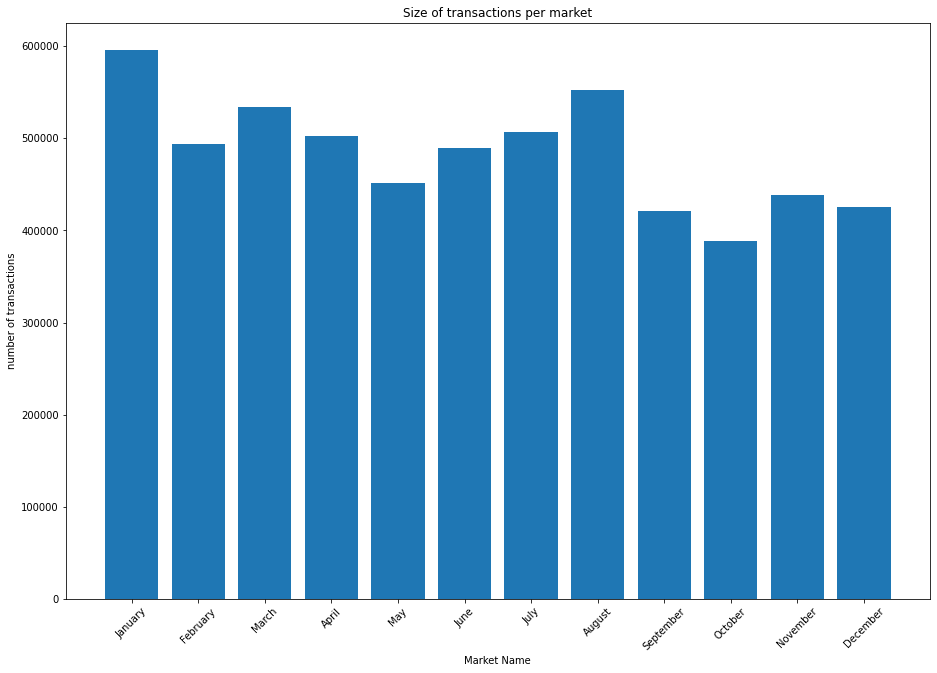

In [121]:
fig = plt.figure()
ax = fig.add_axes([2,2,2,2])
ax.bar(months, months_sales_total)
plt.title('Size of transactions per market')
plt.xlabel('Market Name')
plt.ylabel('number of transactions')  
plt.xticks(rotation=45)
plt.show();

In [117]:
# sort months by time of year
months = sorted(months, key = lambda x: datetime.datetime.strptime(''.join(x),'%B'))

In [130]:
fig = px.bar(df_2018, y=months_sales_total, x=months, title='revenue by month for year 2018')
fig.show()

In [144]:
def get_month_data(df):
    
    year_month_total = pd.DataFrame()
    
    months_dict = {}
    
    months = df_['month_name'].unique().tolist()
    months = sorted(months, key = lambda x: datetime.datetime.strptime(''.join(x),'%B'))
    

    months_sales_total = []
    for i in months:
        total = df_[df_['month_name']== i ]['sales_usd'].sum()
        months_sales_total.append(total)
    
    if 
    
    return list(zip(months, months_sales_total))

In [287]:
# fdf where year is column, index is month value is total revinue 

months = ['January',
         'February',
         'March',
         'April',
         'May',
         'June',
         'July',
         'August',
         'September',
         'October',
         'November',
         'December']
    
year_month_total = pd.DataFrame(months)

year_dict = {}

for i in df['year'].astype(int).unique().tolist():

    df_year = df.query(f'year=={i}')
    
    months = df_year['month_name'].unique().tolist()
    months = sorted(months, key = lambda x: datetime.datetime.strptime(''.join(x),'%B'))
    
    months_sales_total = []
    
    for j in months:
        total = df_year[df_year['month_name']== j ]['sales_usd'].sum()
        months_sales_total.append(total)
    year_dict[i] = pd.DataFrame(months_sales_total)
    

    

In [255]:
months = ['January',
         'February',
         'March',
         'April',
         'May',
         'June',
         'July',
         'August',
         'September',
         'October',
         'November',
         'December']

In [258]:
df_ = pd.concat(year_dict, axis=1)
df_.columns = df_.columns.droplevel(1)
dictionary = dict(zip(range(0,12), months))
df_.columns = df_.columns.astype(str)
df_ = df_.rename(dictionary, axis='index')
df_

,2017,2018,2019,2020
January,368890.984,595303.226,441445.816,359235.954
February,496881.446,493625.006,380652.048,376960.276
March,445674.698,534378.208,395141.572,369393.038
April,NaN,502868.772,387165.520,353700.662
May,NaN,451834.376,392709.814,326040.232
June,NaN,488957.518,355856.186,205967.664
July,NaN,507199.532,492691.948,NaN
August,NaN,552434.750,450969.036,NaN
September,NaN,421435.434,350861.994,NaN
October,NaN,388239.978,374148.110,NaN


In [284]:
df_ = df_.reset_index()
plot_df = pd.melt(df_, id_vars=['index'])
plot_df

,index,variable,value
0,January,2017,368890.984
1,February,2017,496881.446
2,March,2017,445674.698
3,April,2017,NaN
4,May,2017,NaN
5,June,2017,NaN
6,July,2017,NaN
7,August,2017,NaN
8,September,2017,NaN
9,October,2017,NaN


In [286]:
fig = px.line(plot_df, x="index", y="value", color='variable')
fig.show()
